### 3. 차원 축소 이해하기
+ 데이터 세트에는 처리할 수 있는 것보다 더 많은 특징들이 포함돼 있다. 
  + 예를 들어, 우리의 임무는 한 국가의 빈곤율을 예측하는 것이라고 가정해보자. 
    1. 먼저 빈곤율에 국가 이름을 매치시키는 것으로 시작한다. 
    2. 그 후 빈곤의 원인에 대해 생각해봐야 하는데, 빈곤율을 예측하는 데 도움이 되는 기능이라면 무수히 많은 것이고, 수학자의 경우 고차원 공간에서 이러한 기능을 축으로 생각할 수 있다. 
    3. 따라서 모든 국가의 빈곤율은 이러한 __고차원 공간에서 단일 지점으로 표현__될 수 있다.
  + 문제는 이런 고차원 공간의 개념이 너무 어렵다는 것이다. 위의 예를 단순하게 생각하기 위해 GDP와 인구수 두 가지 기능만 살펴보자. 
    1. 2차원 공간에서 GDP를 x축으로, 인구수를 y축으로 해석한다.
    2. xy 평면에 각 나라의 특징 값을 기준으로 점을 그린다(네 개의 나라를 표현했다고 가정).
  + 다음으로 국가별 이혼율과 같은 세 번째 특징을 추가하면 다음과 같은 일이 벌어진다.
    1. 국가별 이혼율이 z축으로 추가된다. 
    2. 각 값을 기준으로 네 개의 나라를 점으로 표현한다.
    3. xy평면 상에서 표현된 네 개의 나라가 xyz 공간상으로 확대되니 상대적으로 빈 공간이 많이 생기게 된다.
  + 차원이 늘어나면서 공간이 많이 비게되는 문제를 __curse of dimensionality(차원의 저주)__라고 표현한다. 
    + 사용 가능한 공간을 채우기 위해 필요한 데이터 요소의 수는 차원의 수에 따라 기하급수적으로 커질 수 있다. classifier(분류기)에서 전체 특징 공간에 걸쳐있는 데이터 점들이 제공되지 않으면, 이전에 발생한 모든 데이터 포인트에서 멀리 떨어져 있는 새 데이터 포인트가 표시될 경우 분류기는 알 수 없다.
    + 실제로 차원의 저주는 주어진 표본 크기에서 최대 특징 개수를 가질 수 있음을 의미하며, 그 이상의 경우 분류기의 성능이 향상되지 않고 저하된다.
  + 따라서 __데이터 세트에 대해 최적의 차원을 찾아야 하고__, 이러한 방법이 적용될 때 __dimensionality reduction이 발생__한다. 이들은 많은 정보를 잃지 않고서도 고차원 데이터를 간결하게 표현하기 위함이다.
  + 이 부분에 대한 설명 [참고 링크](https://medium.com/qandastudy/mathpresso-%EB%A8%B8%EC%8B%A0-%EB%9F%AC%EB%8B%9D-%EC%8A%A4%ED%84%B0%EB%94%94-15-%EC%B0%A8%EC%9B%90-%EC%B6%95%EC%86%8C-dimensionality-reduction-76b13460506f)
  
####   
#### 1) OpenCV에서 __PCA(Principal Component Analysis)__ 구현하기
  + 가장 일반적인 차원 축소 기술 중 하나는 PCA(주성분 분석)다.
  + 수행 절차는 다음과 같다. [참고 링크](https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/)
    1. 기존 데이터 X의 __공분산행렬(Covariation matrix)__ 계산.
    2. 공분산행렬의 고유값과 __고유 벡터(eigenvector)__ 계산.
    3. 고유값의 크기 순서대로 고유 벡터를 나열.
    4. 새 기저를 기준으로 고차원 공간의 표본들을 __저차원 공간으로 사영__.
  

Text(0,0.5,'feature 2')

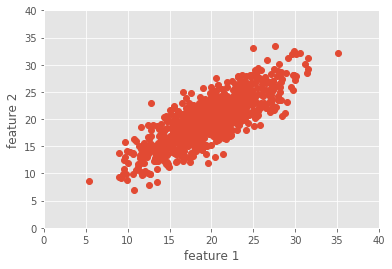

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

np.random.seed(42)

mean = [20, 20]
cov = [[5, 0], [25, 25]]

# 두 가지 특징을 추출할 수 있는 데이터 세트를 가정하고 플롯하면, 
# 데이터는 일부 다변수 가우시안(multivariate Gaussian)내에 존재할 수 있다.
x, y = np.random.multivariate_normal(mean, cov, 1000).T

plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

####   
  + PCA가 하는 일은 대부분의 데이터 확산을 표시하는 두 축 내에서 데이터가 정렬될 때까지 모든 데이터 점을 회전시킨다.
  + cv2.PCACompute를 호출하면 PCA를 수행할 수 있지만, 그 전에 특징 벡터 x와 y를 하나의 특징 행렬 X에 쌓아야 한다.

In [4]:
X = np.vstack((x, y)).T

####   
+ 그런 다음 특징 행렬 X에 대해 PCA를 계산한다. 
+ We also specify an empty array np.array([]) for the mask argument, which tells OpenCV to use all data points in the feature matrix.

In [5]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.71481632,  0.69931225],
       [-0.69931225,  0.71481632]])

+ 이 함수는 __투영 전에 평균값을 뺀 값(mean)__과 공분산 행렬의 __고유 벡터(eig)__라는 두 가지 값을 반환한다. 
  + eigenvector는 PCA가 나타내고자 하는 __방향__을 가리킨다.

Text(0,0.5,'feature 2')

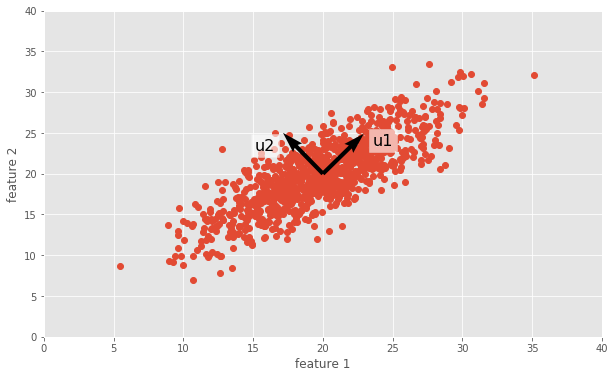

In [9]:
# 고유 벡터 플로팅
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

+ u1은 데이터 확산이 최대인 방향의 고유 벡터이고, 이를 데이터의 첫 번째 주 구성 요소라고 한다. 두 번째 주요 구성 요소는 u2며 데이터에서 두 번째로 큰 변화를 따르는 축을 나타낸다.
####   

+ 최대 확산 축 u1, u2가 x축과 y축에 정렬되도록 데이터를 회전해보고 플로팅해보자.

[-20, 20, -10, 10]

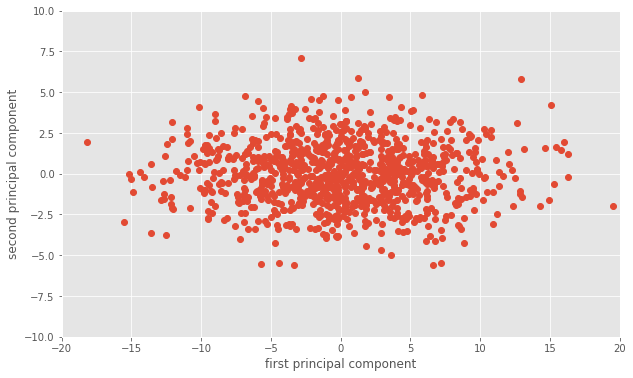

In [10]:
X2 = cv2.PCAProject(X, mu, eig)
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

+ 데이터가 x축(u1이 회전된)을 따라 가장 많이 퍼져 있음을 알 수 있다. 따라서 투영한 결과는 성공적이라고 볼 수 있다.
####   
  
  
#### 2) ICA(Independent Component Analysis. 독립 성분 분석) 구현하기.
+ ICA는 PCA와 동일한 수학적 단계를 따르지만, 분해 성분을 상호간에 가능한 한 독립적으로 선택한다.
+ PCA와 ICA에 대한 [참고 링크](https://m.blog.naver.com/PostView.nhn?blogId=dndusdndus21&logNo=220323666085&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F)

In [14]:
from sklearn import decomposition

ica = decomposition.FastICA()
X2 = ica.fit_transform(X)

C:\ProgramData\Anaconda3\envs\Python3\lib\site-packages\sklearn\decomposition\fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


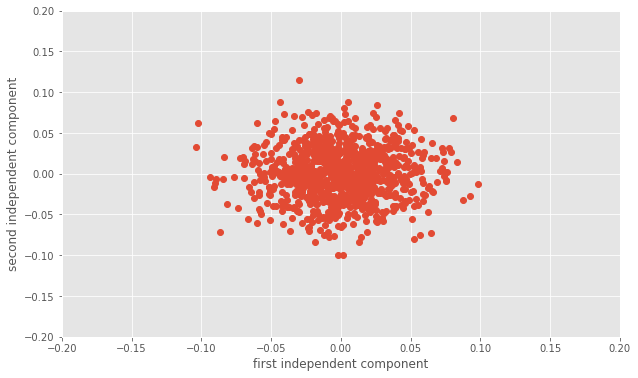

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])
plt.savefig('ica.png')

+ 회전된 데이터를 플로팅하면 이전의 PCA에서 얻은 결과와 비슷한 결과를 얻는다.
####   

#### 3) NMF(Non-negative Matrix Factorization) 구현.
+ PCA, ICA와 동일한 기본 수학 연산을 사용하지만, 음수가 아닌 데이터에서만 작동한다는 제약이 있다.
+ 따라서 결과의 분해 성분은 모두 음이 아닌 값을 가지게 된다.

[0, 7, 0, 15]

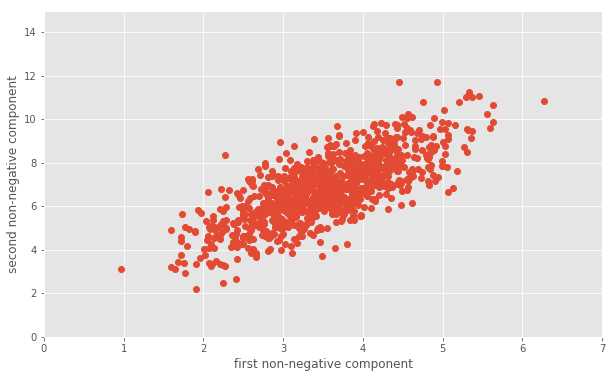

In [19]:
nmf = decomposition.NMF()
X3 = nmf.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.plot(X3[:, 0], X3[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([0, 7, -0, 15])

+ NFM의 특징인 결과 분해 값은 PCA, ICA와 다르게 보인다.
####   

  
+ 지금까지 데이터 분해 도구를 공부했으니, 다음에는 몇 가지 일반적인 데이터 유형을 살펴볼 것이다.